In [1]:
import string

In [2]:
from scipy import stats

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [5]:
import re

In [6]:
def find_strength(string):
    value = string.find('/6')
    if string[value-1] is '(':
        return (None)
    else:
        return string[value-1]

In [7]:
def cigar_details(string):
    size = string.split('\n')
    return size[2].strip()

In [8]:
#consider striping '-' before date and turing string into date-time object
def cigar_og_issue_date(string):
    size = string.split('\n')
    return size[3].strip()

In [9]:
#built for df.gauge
def make_int(string):
    try:
        string = int(string)
        return string
    except:
        pass

In [10]:
from fractions import Fraction
#convert some string into floats (inch)
def convert_length_2_float(string):
    try:
        string = string.strip('"')
        string = string.split(' ')
        inch = int(string[0])
        if string[1]:
            fraction = string[1]
        return (inch + float(Fraction(fraction)))
    except:
        string = string.strip('"')
        string = string.split(' ')
        inch = int(string[0])
        return inch

In [11]:
#still have 'miscellanious and misc.' as labels, but close enough for now.
def size_filter(string):
    try:
        string = string.lower()
        return(string)
    except:
        return None
    
#code to make a most common sizes data frame.   
#df_common_size = df[df['size'].map(df['size'].value_counts()) > 100]    

In [12]:
#not a good way to do it.

#or maybe filtering via dictionary is a good idea. either way, keep an original csv!!!!

#replacement dictionary for the factory country column
country_replacement_dict = {'Cuba':'cub', 'Dominican Republic':'dr', 'Nicaragua':'nic', 'Honduras':'hon', 'Jamaica':'jam',
       'Mexico':'mex', 'U.S.A.':'usa', 'Philippines':'phl', 'Canary Islands':'can', 'Brazil':'brz',
       'Nicaragua, Honduras':'nic', 'Costa Rica':'cst', 'Indonesia':'ind', 'Bahamas':'bah',
       'Panama':'pan', 'nan':None, 'USA':'usa', 'NIcaragua':'nic', 'El Salvador':'sal', 'Colombia':'col',
       'Dominican  Republic':'dr', 'Dominican Repubcic':'dr', 'Dominican Repubilc':'dr',
       'Dom. Rep.':'dr', 'Nicaraqua':'nic', 'U.S.A':'usa', 'Domincan Republic':'dr',
       'Nicarag’ua':'nic', 'Dominican Rep"ublic':'dr'}
#df.country.replace(replacement_dict, inplace=True)

#will change the mispelling to the last mispelling so i only have one mispelled country instead of multiples
replacement_dict = {value : key for (key, value) in country_replacement_dict.items()}

#example
replacement_dict['nic'] = 'Nicaragua'

#return back to OG label w/ caps
#df.country.replace(replacement_dict, inplace=True)


In [13]:
#split binder, but it's terrible. went from 86 to 66 features
def filler_binder_wrapper_reduce(string):
    vowels = ['a','e','i','o','u']
    try:
        string = string.lower()
        string = string.replace('.','')
        string = string.replace(' ', '')
        string = "".join([x for x in string if x not in vowels])
        return (string)#[:10])
    except AttributeError:
        return None

In [54]:
data = pd.read_csv('cigar_aficionado.csv', index_col='Unnamed: 0')

In [55]:
data.shape

(20769, 19)

In [56]:
df = data.copy()

In [57]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [58]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"


# ttests of score by country 

In [59]:
scores_df = df.groupby("country").filter(lambda x: len(x) > 10)

In [60]:
scores_df.country.value_counts()

Dominican Republic    8402
Nicaragua             4941
Honduras              3469
Cuba                  2763
U.S.A                  371
Mexico                 201
Jamaica                175
Costa Rica             117
Bahamas                111
Canary Islands          88
Brazil                  42
Philippines             41
Indonesia               19
Name: country, dtype: int64

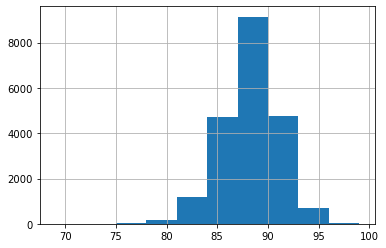

In [61]:
scores_df.score.hist();

count    8402.000000
mean       87.084385
std         2.656531
min        75.000000
25%        85.000000
50%        87.000000
75%        89.000000
max        97.000000
Name: score, dtype: float64


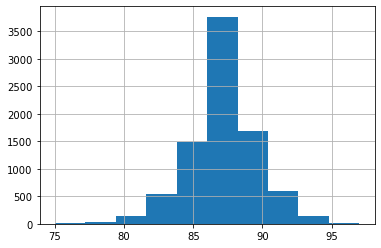

In [63]:
dr_score = scores_df[scores_df.country == 'Dominican Republic'].score
print(dr_score.describe())
dr_score.hist();

count    2763.000000
mean       89.540355
std         2.364676
min        80.000000
25%        88.000000
50%        90.000000
75%        91.000000
max        99.000000
Name: score, dtype: float64


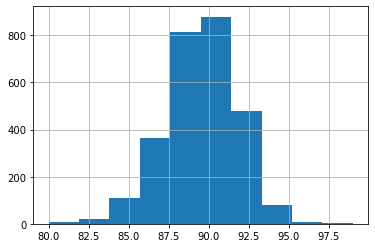

In [66]:
cuba_score = scores_df[scores_df.country == 'Cuba'].score
print(cuba_score.describe())
cuba_score.hist();

count    4941.000000
mean       88.638939
std         2.487128
min        76.000000
25%        87.000000
50%        89.000000
75%        90.000000
max        97.000000
Name: score, dtype: float64


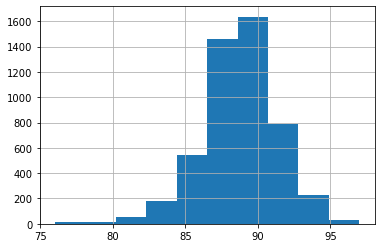

In [65]:
nic_score = scores_df[scores_df.country == 'Nicaragua'].score
print(nic_score.describe())
nic_score.hist();

count    3469.000000
mean       87.237532
std         2.756678
min        70.000000
25%        86.000000
50%        87.000000
75%        89.000000
max        96.000000
Name: score, dtype: float64


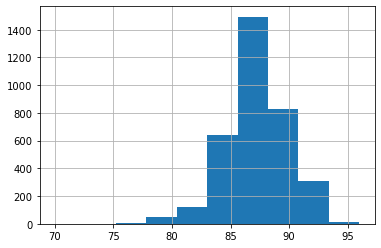

In [64]:
hon_score = scores_df[scores_df.country == 'Honduras'].score
print(hon_score.describe())
hon_score.hist();

count    371.000000
mean      88.169811
std        2.531051
min       80.000000
25%       87.000000
50%       88.000000
75%       90.000000
max       93.000000
Name: score, dtype: float64


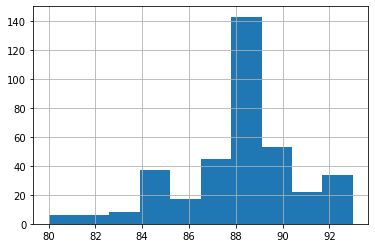

In [92]:
usa_score = scores_df[scores_df.country == 'U.S.A'].score
print(usa_score.describe())
usa_score.hist();

count    175.000000
mean      85.668571
std        2.043742
min       80.000000
25%       84.000000
50%       86.000000
75%       87.000000
max       91.000000
Name: score, dtype: float64


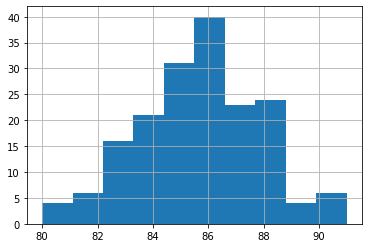

In [93]:
jam_score = scores_df[scores_df.country == 'Jamaica'].score
print(jam_score.describe())
jam_score.hist();

count    201.000000
mean      84.666667
std        4.154917
min       69.000000
25%       82.000000
50%       85.000000
75%       87.000000
max       94.000000
Name: score, dtype: float64


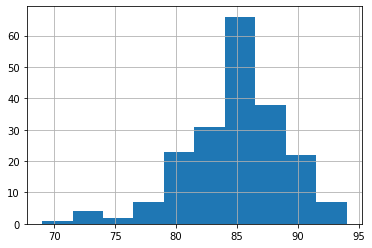

In [94]:
mex_score = scores_df[scores_df.country == 'Mexico'].score
print(mex_score.describe())
mex_score.hist();

In [95]:
scores_df.score.describe()

count    20740.000000
mean        87.766538
std          2.812987
min         69.000000
25%         86.000000
50%         88.000000
75%         90.000000
max         99.000000
Name: score, dtype: float64

# ttest

In [96]:
nic_usa_ttest = stats.ttest_ind(nic_score, usa_score)#, equal_var=False, alternative = 'greater')

In [97]:
nic_usa_ttest

Ttest_indResult(statistic=3.4996154046405596, pvalue=0.0004697545455294946)

t-statistic is 3.4996154046405596, and p-value is 0.0004697545455294946


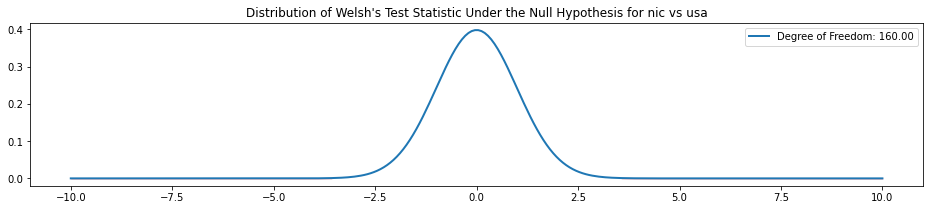

In [98]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-10, 10, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= nic_usa_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= -nic_usa_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for nic vs usa")

print(f"t-statistic is {nic_usa_ttest[0]}, and p-value is {nic_usa_ttest[1]}")


In [99]:
dr_score.mean()
len(dr_score)

8402

In [100]:
cuba_score.mean()
len(cuba_score)

2763

In [101]:
dr_cuba_ttest = stats.ttest_ind(dr_score, cuba_score, equal_var=False,alternative = 'less')

t-statistic is -45.89425465545143, and p-value is 0.0


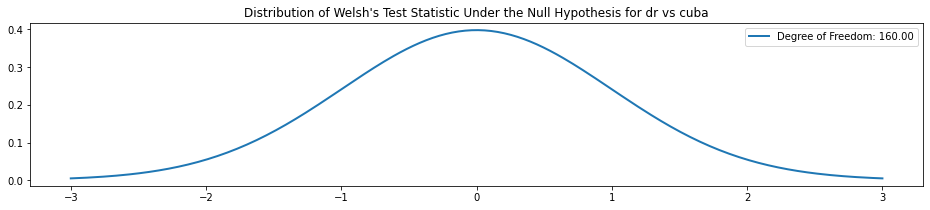

In [102]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
curve = stats.t(160)
ax.plot(x, curve.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(160))
ax.fill_between(x, curve.pdf(x), where=(x >= -dr_cuba_ttest[0]), color="red", alpha=0.25)
ax.fill_between(x, curve.pdf(x), where=(x <= dr_cuba_ttest[0]), color="red", alpha=0.25)
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis for dr vs cuba")

print(f"t-statistic is {dr_cuba_ttest[0]}, and p-value is {dr_cuba_ttest[1]}")


In [103]:
stat, p = stats.f_oneway(dr_score, cuba_score, nic_score, jam_score, hon_score)

In [104]:
print(p)
print(stat)

0.0
672.0690430681683


# fixing the features

In [105]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [106]:
df.country.unique()

array(['Cuba', 'Dominican Republic', 'Nicaragua', 'Honduras', 'Jamaica',
       'Mexico', 'U.S.A', 'Philippines', 'Canary Islands', 'Brazil',
       'Costa Rica', 'Indonesia', 'Bahamas', 'Panama', nan, 'El Salvador',
       'Colombia'], dtype=object)

In [107]:
df.gauge.unique()

array([50., 43., 44., 52., 49., 42., 48., 47., 41., 56., 45., 46., 54.,
       38., 36., 51., 34., 35., 30., 40., 55., 60., 58., 64., 33., 32.,
       31., 66., 37., 28., 39., 53., nan, 62., 61., 29., 26., 57.,  5.,
       67., 59.,  6., 65., 70., 24., 63., 80.])

In [108]:
len(df.binder.unique())

86

In [42]:
df.binder.describe()

count         20739
unique           85
top       Dom. Rep.
freq           6006
Name: binder, dtype: object

In [43]:
df.binder.value_counts()

Dom. Rep.                 6006
Nicaragua                 5899
Cuba                      2760
Honduras                  1573
Mexico                    1309
                          ... 
Connecticut                  1
Cameroon, Ecuador            1
U.S.A./Penn. Broadleaf       1
tk                           1
honduras                     1
Name: binder, Length: 85, dtype: int64

# filler -start at 387 to 334

In [44]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43.0,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44.0,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50.0,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50.0,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"


# length

In [45]:
df.length.unique()

array(['4 7/8"', '5 5/8"', '5 1/2"', '5"', '4 1/2"', '7 5/8"', '7 1/2"',
       '6"', '5 9/16"', '5 1/4"', '5 7/8"', '5 3/4"', '6 1/2"', '6 5/8"',
       '6 3/4"', '7"', '6 1/4"', '6 7/8"', '6 9/16"', '4 3/4"', '5 1/8"',
       '8 1/2"', '8"', '7 1/4"', '6 3/8"', '6 1/8"', '6 5/16"', '4 5/8"',
       '7 3/4"', '6 1/2', '4 1/4"', '9"', '6 15/16', '8 1/4"', '8 2/3"',
       '5 1/16"', '6 7/4"', '4"', '5 3/5"', '8 1/2', '7 1/2', '7 5/8',
       '7 3/4', '9 1/4"', '5 3/8"', '8 7/8"', '7 1/8"', '5 1/5"',
       '5 3/16"', '8 1/4', '10"', '4 1/5"', '4 1/4 "', '5 1/3"',
       '4 1/2 "', '6 1/3"', '6 1/5"', '8', nan, '9 1/2"', '3 1/2"',
       '4 3/8"', '7 7/8"', '7 3/8"', '4', '6 1/2 "', "7 1/4'", '7 2/4"',
       '6 3/32"', '8 5/8"', '3 5/8"', '8 3/4"', '4 1/3"', '5 5/8""',
       '5"\x0b', '3 15/16"', '6 11/16"', '5 11/16"', '4 5/16"', '4 1/8"',
       '4 15/16"', '4 3/16"', '"', '6 1/8', '9 1/8', '7 1/4', '4 4/5"',
       '6 9/6"', 'tk"', '12"', '50', '52', 'TK', '6 1/4', '3 3/4"',
      

In [46]:
df['filter_length'] = [convert_length_2_float(metric) for metric in df.length]

AttributeError: 'list' object has no attribute 'strip'

In [ ]:
sum(df['filter_length'].isna())

In [ ]:
df.filter_length

In [47]:
df.length.loc[4]

'5"'

In [48]:
df.length.iloc[:10]

0     4 7/8"
2     5 5/8"
3     5 1/2"
4         5"
5     4 1/2"
6     4 1/2"
7     4 1/2"
8     4 7/8"
9     4 7/8"
10    4 7/8"
Name: length, dtype: object